In [1]:
!pip install -q -U transformers bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 43.0 MB/s eta 0:00:00


In [2]:
import torch
from transformers import BitsAndBytesConfig, pipeline

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

# using llava-1.5-7b-hf
model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

print("Model loaded!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Model loaded!


In [11]:
# Define the JSON structure and Prompt

# The specific fields requested
json_structure_definition = """
{
    "scratchpad": "string", # a place to reason about *ALL* features below. Ensure you answer and reason about all questions asked here. Be concise.
    "description": "string", description of the scene
    "baby_present": bool,          # True ONLY if the baby is VISIBLE in the crib. Do not mistake with loose blankets.
    "face_down": bool,             # True ONLY if the baby is on its stomach.
    "crying": bool,                # True if the baby is crying.
    "sleeping": bool,              # True if the baby is sleeping.
    "severity": int,          # 0-10 scale where 10 is extreme danger.
    "hazards": [str],         # List of other potential hazards detected (if any).
    "notify": bool            # True if parents should be alerted immediately. Only if the baby is in danger.
}
"""

# The system prompt to guide the model
baby_monitor_prompt = f"""USER: <image>
You are an intelligent baby monitor agent. Analyze the image provided. Determine the presence of a baby in the image,
and the saftey of the baby if there is one.

Do *NOT* confuse the baby with loose blankets.

If the baby is not present, all fields (excluding description) are 0, false, or empty.

Return your analysis ONLY as a valid JSON object matching this structure:
{json_structure_definition}

Do not include any text outside the JSON.
ASSISTANT:
"""

print("Prompt and JSON structure defined.")

Prompt and JSON structure defined.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Test Model on Random Sample**

Found annotation file: /content/drive/MyDrive/large/large.json
Found images directory: /content/drive/MyDrive/large/images
Selected images for testing: ['synth_00316.png', 'synth_00272.png', 'synth_00414.png', 'synth_00131.png', 'synth_00416.png', 'synth_00093.png', 'synth_00315.png', 'synth_00270.png', 'synth_00290.png', 'synth_00280.png']


==================== Processing: synth_00316.png ====================


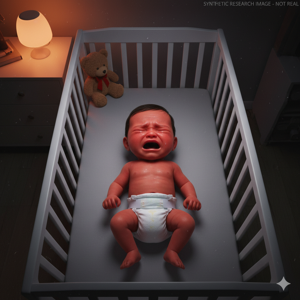


[Ground Truth Annotation]:
{
  "id": "synth_00316",
  "image": "images/synth_00316.png",
  "prompt": "overhead crib view of a face red and scrunched South Asian 1-month-old baby diaper only in a modern white crib, distressed, nighttime with nightlight, teddy bear in corner.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a computer-generated image of a baby crying in a crib. The baby appears to be in a safe environment, with no visible hazards. The baby's face is not visible, but the image shows the baby crying and laying down in the crib. The baby's crying may indicate discomfort or hunger, but it is not possible to determine the exact cause of the crying from the image alone.",
"baby\_present": true,
"face\_down": f

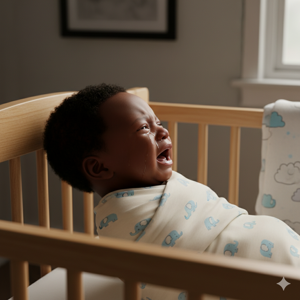


[Ground Truth Annotation]:
{
  "id": "synth_00272",
  "image": "images/synth_00272.png",
  "prompt": "side profile in crib of a tears streaming African American newborn baby wrapped in swaddle in a wooden crib, distressed, dim nursery light, with patterned blanket.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "The baby is crying in the crib. The baby is laying down and appears to be in a safe position. The baby's face is not visible in the image. The baby's crying may indicate discomfort or hunger. The baby's crying does not seem to be severe.",
"baby\_present": true,
"face\_down": true,
"crying": true,
"sleeping": false,
"severity": 5,
"hazards": [],
"notify": false
}

==================== Processing: synth_00414.png =====

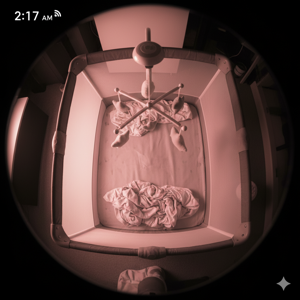


[Ground Truth Annotation]:
{
  "id": "synth_00414",
  "image": "images/synth_00414.png",
  "prompt": "overhead crib view of an empty playpen, rumpled mobile hanging above, infrared-like glow, no baby visible.",
  "label": "not-present",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "not-present"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a baby monitor image. We need to determine if there is a baby in the crib and if the baby is in danger. We should also identify any potential hazards in the crib.",
"baby\_present": false,
"face\_down": false,
"crying": false,
"sleeping": false,
"severity": 0,
"hazards": [],
"notify": false
}

==================== Processing: synth_00131.png ====================


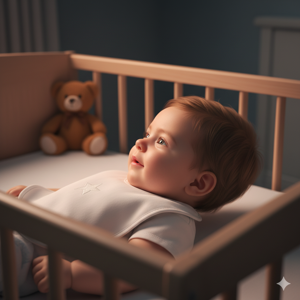


[Ground Truth Annotation]:
{
  "id": "synth_00131",
  "image": "images/synth_00131.png",
  "prompt": "side profile in crib of a gentle smile Caucasian 1-month-old baby with bib in a wooden crib, awake but content, nighttime with nightlight, teddy bear in corner.",
  "label": "awake/peaceful",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/peaceful"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a computer-generated image of a baby in a crib. The baby is smiling and appears to be happy. There is a teddy bear in the crib with the baby, which adds a sense of comfort and familiarity to the scene. The baby's position and the presence of the teddy bear suggest that the baby is safe and content in their environment.",
"baby\_present": true,
"face\_down": false,
"crying": false,
"sleeping": false,
"severity

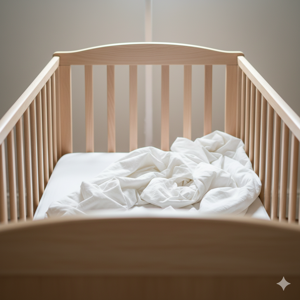


[Ground Truth Annotation]:
{
  "id": "synth_00416",
  "image": "images/synth_00416.png",
  "prompt": "side profile in crib of an empty wooden crib, rumpled plain white crib sheets, bright overhead lamp, no baby visible.",
  "label": "not-present",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "not-present"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "The image shows a crib with a white sheet and a white blanket. There is no baby visible in the crib. The crib appears to be safe for the baby. The presence of the baby cannot be determined from the image.",
"baby\_present": false,
"face\_down": false,
"crying": false,
"sleeping": false,
"severity": 0,
"hazards": [],
"notify": false
}

==================== Processing: synth_00093.png ====================


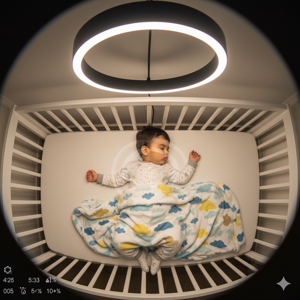


[Ground Truth Annotation]:
{
  "id": "synth_00093",
  "image": "images/synth_00093.png",
  "prompt": "slightly distorted fisheye lens of a slight breathing motion South Asian toddler baby pajamas in a modern white crib, bright overhead lamp, with patterned blanket.",
  "label": "asleep",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "asleep"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a baby monitor image. We need to determine if there is a baby in the crib and if the baby is in danger. We should also check for loose blankets that could pose a hazard to the baby.",
"baby\_present": true,
"face\_down": false,
"crying": false,
"sleeping": false,
"severity": 0,
"hazards": [],
"notify": false
}

==================== Processing: synth_00315.png ====================


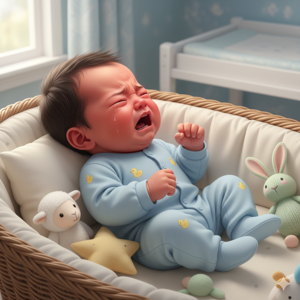


[Ground Truth Annotation]:
{
  "id": "synth_00315",
  "image": "images/synth_00315.png",
  "prompt": "side profile in crib of a face red and scrunched Asian 1-month-old baby pajamas in a bassinet, distressed, soft daylight, scattered soft toys.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a cartoon of a baby crying in a crib. The baby is wearing a blue outfit and there are stuffed animals around the crib. The baby appears to be upset and crying. There is a window in the background. The scene is likely a depiction of a baby's emotions and experiences. The baby's emotions and experiences are likely to be a source of comfort and joy for the baby's parents. The baby's emotions and experiences are likely to be a source 

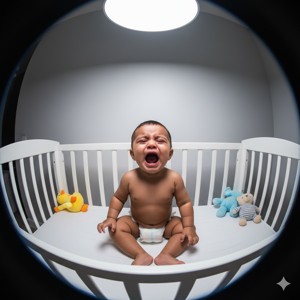


[Ground Truth Annotation]:
{
  "id": "synth_00270",
  "image": "images/synth_00270.png",
  "prompt": "slightly distorted fisheye lens of a mouth open wailing South Asian 6-month-old baby diaper only in a modern white crib, distressed, bright overhead lamp, scattered soft toys.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "In the image, there is a baby sitting in a crib. The baby appears to be crying, and there are two stuffed animals in the crib with the baby. The baby's face is down, and the baby seems to be in a safe environment. The baby's crying level is 7 out of 10, indicating a moderate level of distress. There are no other hazards detected in the image.",
"baby\_present": true,
"face\_down": true,
"crying": true,
"sl

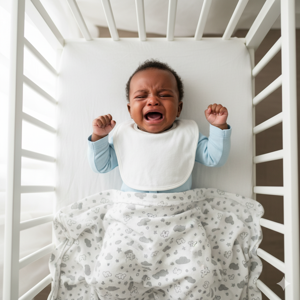


[Ground Truth Annotation]:
{
  "id": "synth_00290",
  "image": "images/synth_00290.png",
  "prompt": "overhead crib view of a face red and scrunched African American 9-month-old baby with bib in a modern white crib, distressed, soft daylight, with patterned blanket.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "The baby is crying in the crib. The baby is wearing a white bib. The baby is laying on its back. The baby is not sleeping. The baby is not face down. The baby is not in danger. There are no hazards detected. The baby's crying is not severe. The baby's bib is white. The baby is wearing a white bib.",
"baby\_present": true,
"face\_down": false,
"crying": true,
"sleeping": false,
"severity": 3,
"hazards": [],
"notify": 

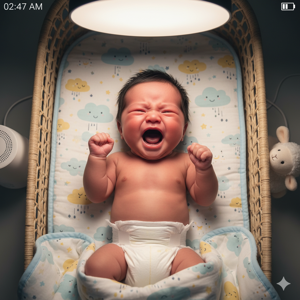


[Ground Truth Annotation]:
{
  "id": "synth_00280",
  "image": "images/synth_00280.png",
  "prompt": "angled from baby monitor camera of a mouth open wailing Asian newborn baby diaper only in a bassinet, distressed, bright overhead lamp, with patterned blanket.",
  "label": "awake/crying",
  "conversations": [
    {
      "from": "human",
      "value": "<image>\nClassify the baby's state in the crib: asleep, awake/peaceful, awake/crying, or not-present."
    },
    {
      "from": "gpt",
      "value": "awake/crying"
    }
  ]
}

[Model Prediction]:
{
"scratchpad": "This is a baby monitor image. We need to determine if the baby is present and if there are any hazards. We should also consider the baby's safety.",
"baby\_present": true,
"face\_down": false,
"crying": true,
"sleeping": false,
"severity": 7,
"hazards": [],
"notify": true
}


In [9]:
import os
import json
import random
from PIL import Image
from transformers import AutoProcessor

# Define path to the dataset
base_path = '/content/drive/MyDrive/large'

# find the JSON annotation file
all_files = os.listdir(base_path)
json_files = [f for f in all_files if f.endswith('large.json')]

if not json_files:
    print(f"No JSON annotation file found in {base_path}")
    annotations = []
else:
    annotation_file = os.path.join(base_path, json_files[0])
    print(f"Found annotation file: {annotation_file}")
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)

# find image files (check 'images' subdirectory first)
images_dir = os.path.join(base_path, 'images')
if 'images' in all_files and os.path.isdir(images_dir):
    print(f"Found images directory: {images_dir}")
    image_base = images_dir
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
else:
    print(f"Looking for images in base path: {base_path}")
    image_base = base_path
    image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# select a few random samples
num_samples = 5
if len(image_files) < num_samples:
    selected_images = image_files
else:
    selected_images = random.sample(image_files, num_samples)

print(f"Selected images for testing: {selected_images}\n")

processor = None
if 'pipe' in globals():
    try:
        # Use the model_id if available, otherwise use the known LLaVA ID
        m_id = globals().get('model_id', "llava-hf/llava-1.5-7b-hf")
        processor = AutoProcessor.from_pretrained(m_id)
    except Exception as e:
        print(f"Could not load processor: {e}")

# run inference and compare
for img_name in selected_images:
    img_path = os.path.join(image_base, img_name)
    image = Image.open(img_path).convert("RGB")

    print(f"\n{'='*20} Processing: {img_name} {'='*20}")
    display(image.resize((300, int(300 * image.height / image.width)))) # Display resized image

    # Attempt to retrieve annotation
    ann_entry = "No annotation found"

    # normalize paths for matching
    def match_annotation(img_filename, annotations):
        if isinstance(annotations, dict) and img_filename in annotations:
            return annotations[img_filename]
        elif isinstance(annotations, list):
            for item in annotations:
                if item.get('file_name') == img_filename or item.get('image') == img_filename:
                    return item
                if item.get('image') and item.get('image').endswith(img_filename):
                    return item
        return "No annotation found"

    ann_entry = match_annotation(img_name, annotations)

    print(f"\n[Ground Truth Annotation]:\n{json.dumps(ann_entry, indent=2)}")

    if 'pipe' in globals() and processor:
        try:
            # Prepare inputs using the processor (handles <image> expansion)
            inputs = processor(text=baby_monitor_prompt, images=image, return_tensors="pt")

            # Move inputs to the correct device
            inputs = {k: v.to(pipe.model.device) for k, v in inputs.items()}

            # Generate
            output_ids = pipe.model.generate(**inputs, max_new_tokens=256)
            generated_text = processor.batch_decode(output_ids, skip_special_tokens=True)[0]

            if "ASSISTANT:" in generated_text:
                response = generated_text.split("ASSISTANT:")[-1].strip()
            else:
                response = generated_text

            print(f"\n[Model Prediction]:\n{response}")

        except Exception as e:
            print(f"\n[Model Prediction Error]: {e}")
    else:
        print("\n[Model Prediction]: Skipped (Model 'pipe' or 'processor' not loaded. Please run the setup cells.)")

**Setup Save File**

In [6]:
# Define output path for predictions
output_json_path = '/content/drive/MyDrive/large/model_predictions.json'

# Initialize list to store results
model_predictions = []

# Verify image_files availability (defined in previous cells)
if 'image_files' in globals():
    print(f"Total images to process: {len(image_files)}")
else:
    print("Warning: 'image_files' variable not found. Please ensure the previous data loading cell was executed.")

print(f"Results will be saved to: {output_json_path}")

Total images to process: 480
Results will be saved to: /content/drive/MyDrive/large/model_predictions.json


**Run Prediction Loop With Incremental Saving**



In [ ]:
import json
import re
from PIL import Image
import torch
import os

# extract and validate JSON from text
def extract_json(text):
    try:
        # Find the first valid JSON object
        match = re.search(r'(\{.*\})', text, re.DOTALL)
        if match:
            json_str = match.group(1)
            # Fix common LLaVA/Markdown artifact: escaped underscores in keys
            json_str = json_str.replace(r"\_", "_")
            return json.loads(json_str)
        return None
    except json.JSONDecodeError:
        return None

# Ensure we have the list of images
if 'image_files' not in globals():
    print("Error: image_files list is missing. Please run the previous cells.")
else:
    total_images = len(image_files)
    print(f"Starting robust inference on {total_images} images with retries...\n")

    # Ensure the results list exists (it should be initialized in the previous cell)
    if 'model_predictions' not in globals():
        model_predictions = []

    # Loop through all images
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(image_base, img_name)

        # Retry settings
        max_retries = 3

        final_prediction = None
        raw_response = ""
        valid_json = False

        try:
            # Open and convert image
            image = Image.open(img_path).convert("RGB")

            # Retry loop
            for attempt in range(max_retries + 1):

                # Prepare inputs using the processor
                inputs = processor(text=baby_monitor_prompt, images=image, return_tensors="pt")
                inputs = {k: v.to(pipe.model.device) for k, v in inputs.items()}

                # Generate output (using defaults as requested)
                output_ids = pipe.model.generate(
                    **inputs,
                    max_new_tokens=512,
                    repetition_penalty=1.2,
                    temperature=0.1,
                )

                # Decode the output
                generated_text = processor.batch_decode(output_ids, skip_special_tokens=True)[0]

                # Extract the extraction part (after ASSISTANT:)
                if "ASSISTANT:" in generated_text:
                    response = generated_text.split("ASSISTANT:")[-1].strip()
                else:
                    response = generated_text

                raw_response = response

                # Attempt to parse JSON
                parsed_data = extract_json(response)
                if parsed_data:
                    final_prediction = parsed_data
                    valid_json = True
                    break
                else:
                    print(f"  - Attempt {attempt + 1} failed for {img_name}.")
                    print(f"    >> Failed Output: {response}")
                    if attempt < max_retries:
                        print("    Retrying...")

            # Create result entry
            result_entry = {
                "filename": img_name,
                "prediction": final_prediction if final_prediction else raw_response,
                "valid_json": valid_json
            }

            # Append to global list
            model_predictions.append(result_entry)

            # Incremental save to JSON file
            with open(output_json_path, 'w') as f:
                json.dump(model_predictions, f, indent=2)

            status = "Valid JSON" if valid_json else "Failed Parsing"
            print(f"Processing {i+1}/{total_images}: {img_name} - {status}")

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

    print("\nRobust inference process finished.")


Starting robust inference on 480 images with retries...

Processing 1/480: synth_00425.png - Valid JSON
Processing 2/480: synth_00455.png - Valid JSON
Processing 3/480: synth_00417.png - Valid JSON
Processing 4/480: synth_00445.png - Valid JSON
Processing 5/480: synth_00319.png - Valid JSON
Processing 6/480: synth_00365.png - Valid JSON
Processing 7/480: synth_00025.png - Valid JSON
Processing 8/480: synth_00212.png - Valid JSON
Processing 9/480: synth_00095.png - Valid JSON
Processing 10/480: synth_00293.png - Valid JSON
Processing 11/480: synth_00206.png - Valid JSON
Processing 12/480: synth_00205.png - Valid JSON
Processing 13/480: synth_00472.png - Valid JSON
Processing 14/480: synth_00279.png - Valid JSON
Processing 15/480: synth_00231.png - Valid JSON
Processing 16/480: synth_00221.png - Valid JSON
Processing 17/480: synth_00158.png - Valid JSON
Processing 18/480: synth_00165.png - Valid JSON
Processing 19/480: synth_00386.png - Valid JSON
Processing 20/480: synth_00018.png - Val